# Phase 1: Exploratory Data Analysis and Data Cleaning

This notebook performs initial data exploration and cleaning for the Rossmann forecasting project.

**Objectives:**
- Load raw train.csv and store.csv files
- Explore data structure and quality
- Perform basic cleaning (datetime conversion, missing values, dtypes)
- Generate visualizations for understanding
- Save cleaned data to `data/processed/train_clean.parquet`

## Setup

In [1]:
import sys
from pathlib import Path

# Add src to path
sys.path.append(str(Path.cwd().parent / 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from data.make_dataset import (
    load_raw_data,
    merge_store_info,
    basic_cleaning,
    save_processed_data,
    get_data_summary
)
from utils.io import ensure_dir

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Ensure output directory exists
ensure_dir('../outputs/figures')

print("Setup complete!")

Setup complete!


## 1. Load Raw Data

In [2]:
# Load raw data using our utility function
train_df, store_df = load_raw_data(raw_path='../data/raw')

print(f"\nTrain shape: {train_df.shape}")
print(f"Store shape: {store_df.shape}")

2025-11-30 22:09:42 - data.make_dataset - INFO - Loading raw data from ../data/raw
2025-11-30 22:09:42 - data.make_dataset - INFO - Reading ../data/raw/train.csv
2025-11-30 22:09:42 - data.make_dataset - INFO - Loaded train data: 1,017,209 rows, 9 columns
2025-11-30 22:09:42 - data.make_dataset - INFO - Reading ../data/raw/store.csv
2025-11-30 22:09:42 - data.make_dataset - INFO - Loaded store data: 1,115 rows, 10 columns

Train shape: (1017209, 9)
Store shape: (1115, 10)


## 2. Initial Data Exploration

### 2.1 Train Data Overview

In [3]:
print("Train Data - First 5 rows:")
display(train_df.head())

print("\nTrain Data - Info:")
train_df.info()

print("\nTrain Data - Descriptive Statistics:")
display(train_df.describe())

print("\nMissing Values in Train:")
missing_train = train_df.isna().sum()
display(missing_train[missing_train > 0])

Train Data - First 5 rows:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



Train Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

Train Data - Descriptive Statistics:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



Missing Values in Train:


Series([], dtype: int64)

### 2.2 Store Data Overview

In [4]:
print("Store Data - First 5 rows:")
display(store_df.head())

print("\nStore Data - Info:")
store_df.info()

print("\nStore Data - Descriptive Statistics:")
display(store_df.describe())

print("\nMissing Values in Store:")
missing_store = store_df.isna().sum()
display(missing_store[missing_store > 0])

Store Data - First 5 rows:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN



Store Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB

Store Data - Descriptive Statistics:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000



Missing Values in Store:


CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### 2.3 Key Insights from Raw Data

Let's explore some key characteristics before cleaning:

In [5]:
# Date range
print(f"Date range: {train_df['Date'].min()} to {train_df['Date'].max()}")

# Number of stores
print(f"Number of unique stores in train: {train_df['Store'].nunique()}")
print(f"Number of stores in store metadata: {len(store_df)}")

# Sales distribution
print(f"\nSales Statistics:")
print(f"  Mean: {train_df['Sales'].mean():.2f}")
print(f"  Median: {train_df['Sales'].median():.2f}")
print(f"  Min: {train_df['Sales'].min():.2f}")
print(f"  Max: {train_df['Sales'].max():.2f}")
print(f"  Zero sales days: {(train_df['Sales'] == 0).sum():,} ({(train_df['Sales'] == 0).mean()*100:.2f}%)")

# Open/Closed distribution
print(f"\nStore Open Status:")
print(train_df['Open'].value_counts())

# Promotion distribution
print(f"\nPromo Distribution:")
print(train_df['Promo'].value_counts())

Date range: 2013-01-01 to 2015-07-31
Number of unique stores in train: 1115
Number of stores in store metadata: 1115

Sales Statistics:
  Mean: 5773.82
  Median: 5744.00
  Min: 0.00
  Max: 41551.00
  Zero sales days: 172,871 (16.99%)

Store Open Status:
Open
1    844392
0    172817
Name: count, dtype: int64

Promo Distribution:
Promo
0    629129
1    388080
Name: count, dtype: int64


## 3. Data Cleaning

Now we'll merge the datasets and perform cleaning using our utility functions.

In [6]:
# Merge train and store data
merged_df = merge_store_info(train_df, store_df)

print(f"\nMerged data shape: {merged_df.shape}")
print(f"Columns: {list(merged_df.columns)}")

2025-11-30 22:09:42 - data.make_dataset - INFO - Merging train and store data on 'Store' column
2025-11-30 22:09:42 - data.make_dataset - INFO - Merged data shape: 1,017,209 rows, 18 columns
2025-11-30 22:09:42 - data.make_dataset - INFO - All stores have metadata

Merged data shape: (1017209, 18)
Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [7]:
# Perform basic cleaning
clean_df = basic_cleaning(merged_df)

print(f"\nCleaned data shape: {clean_df.shape}")
print(f"Date range: {clean_df['Date'].min()} to {clean_df['Date'].max()}")
print(f"Number of stores: {clean_df['Store'].nunique()}")

2025-11-30 22:09:42 - data.make_dataset - INFO - Starting basic data cleaning
2025-11-30 22:09:42 - data.make_dataset - INFO - Converting Date column to datetime
2025-11-30 22:09:42 - data.make_dataset - INFO - Sorting by Store and Date
2025-11-30 22:09:42 - data.make_dataset - INFO - Handling missing values in competition fields
2025-11-30 22:09:42 - data.make_dataset - INFO - Filling 2,642 missing CompetitionDistance values with 100000
2025-11-30 22:09:42 - data.make_dataset - INFO - Filling 323,348 missing CompetitionOpenSinceMonth and 323,348 missing CompetitionOpenSinceYear with 0
2025-11-30 22:09:42 - data.make_dataset - INFO - Filling 508,031 missing Promo2SinceWeek and 508,031 missing Promo2SinceYear with 0
2025-11-30 22:09:42 - data.make_dataset - INFO - Filling 508,031 missing PromoInterval with empty string
2025-11-30 22:09:42 - data.make_dataset - INFO - Converting categorical fields to category dtype
2025-11-30 22:09:42 - data.make_dataset - INFO - Ensuring correct dtypes 

In [8]:
# Check data types after cleaning
print("\nData types after cleaning:")
display(clean_df.dtypes)

print("\nMissing values after cleaning:")
missing_clean = clean_df.isna().sum()
display(missing_clean[missing_clean > 0])


Data types after cleaning:


Store                                 int32
DayOfWeek                             int32
Date                         datetime64[ns]
Sales                               float32
Customers                           float32
Open                                  int32
Promo                                 int32
StateHoliday                       category
SchoolHoliday                         int32
StoreType                          category
Assortment                         category
CompetitionDistance                 float32
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int32
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                      category
dtype: object


Missing values after cleaning:


Series([], dtype: int64)

## 4. Exploratory Data Analysis

### 4.1 Sales Distribution

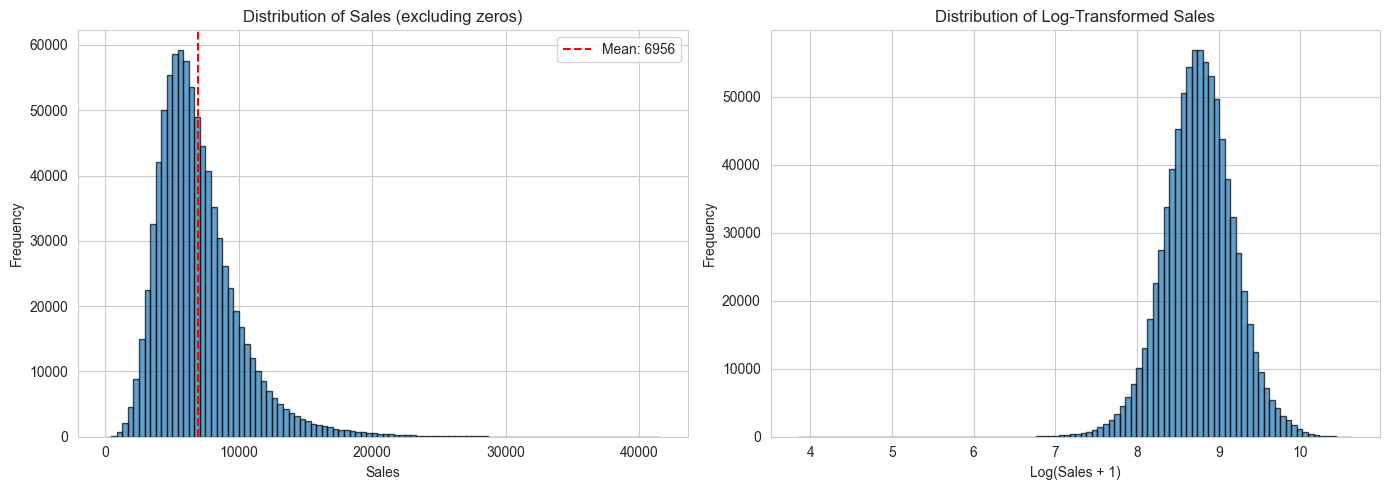

Saved: outputs/figures/01_sales_distribution.png


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales distribution (excluding zeros)
sales_nonzero = clean_df[clean_df['Sales'] > 0]['Sales']
axes[0].hist(sales_nonzero, bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sales (excluding zeros)')
axes[0].axvline(sales_nonzero.mean(), color='red', linestyle='--', label=f'Mean: {sales_nonzero.mean():.0f}')
axes[0].legend()

# Log-transformed sales
axes[1].hist(np.log1p(sales_nonzero), bins=100, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Sales + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log-Transformed Sales')

plt.tight_layout()
plt.savefig('../outputs/figures/01_sales_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/01_sales_distribution.png")

### 4.2 Sales Over Time

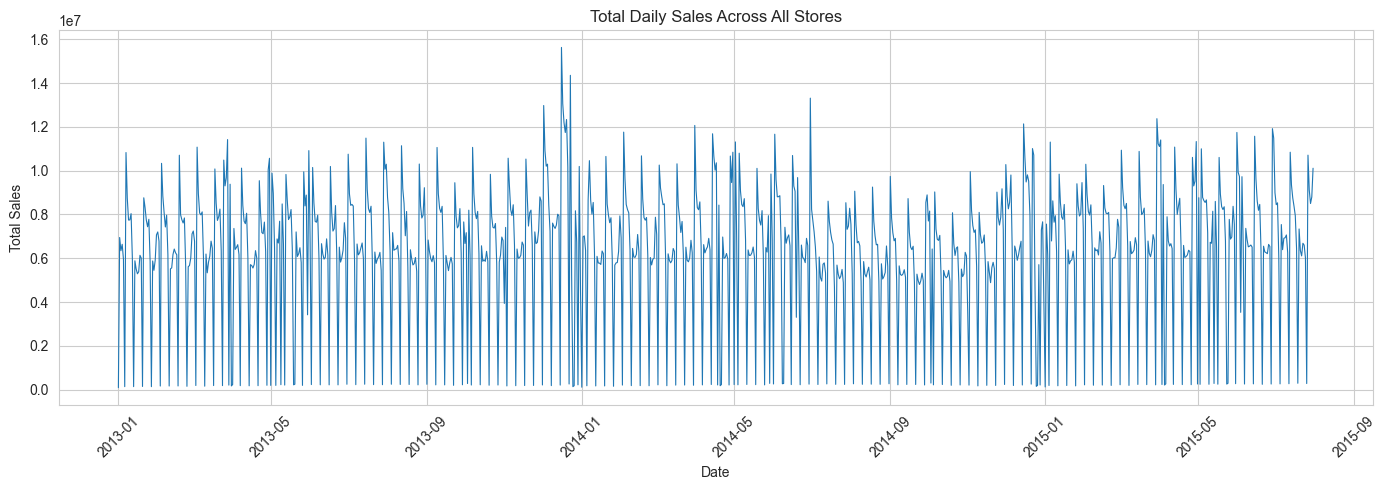

Saved: outputs/figures/02_sales_over_time.png


In [10]:
# Aggregate sales by date
daily_sales = clean_df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(daily_sales['Date'], daily_sales['Sales'], linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Daily Sales Across All Stores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/figures/02_sales_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/02_sales_over_time.png")

### 4.3 Day of Week Analysis

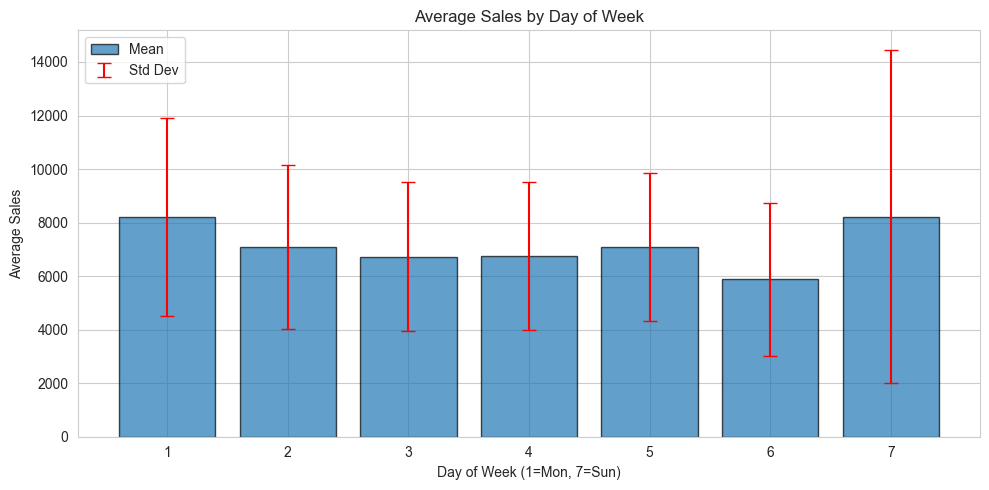

Saved: outputs/figures/03_sales_by_dow.png

Sales Statistics by Day of Week:


,DayOfWeek,mean,median,std
0,1,8216.251953,7539.0,3691.609619
1,2,7088.408691,6502.0,3065.959473
2,3,6728.786621,6210.0,2781.109619
3,4,6768.215332,6246.0,2763.625244
4,5,7073.034180,6581.0,2764.528809
5,6,5875.084961,5425.0,2852.537842
6,7,8224.723633,6876.0,6235.152832


In [11]:
# Average sales by day of week (excluding zeros)
dow_sales = clean_df[clean_df['Sales'] > 0].groupby('DayOfWeek')['Sales'].agg(['mean', 'median', 'std']).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
x = dow_sales['DayOfWeek']
ax.bar(x, dow_sales['mean'], alpha=0.7, label='Mean', edgecolor='black')
ax.errorbar(x, dow_sales['mean'], yerr=dow_sales['std'], fmt='none', ecolor='red', capsize=5, label='Std Dev')
ax.set_xlabel('Day of Week (1=Mon, 7=Sun)')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Day of Week')
ax.set_xticks(x)
ax.legend()
plt.tight_layout()
plt.savefig('../outputs/figures/03_sales_by_dow.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/03_sales_by_dow.png")

print("\nSales Statistics by Day of Week:")
display(dow_sales)

### 4.4 Store Type Analysis

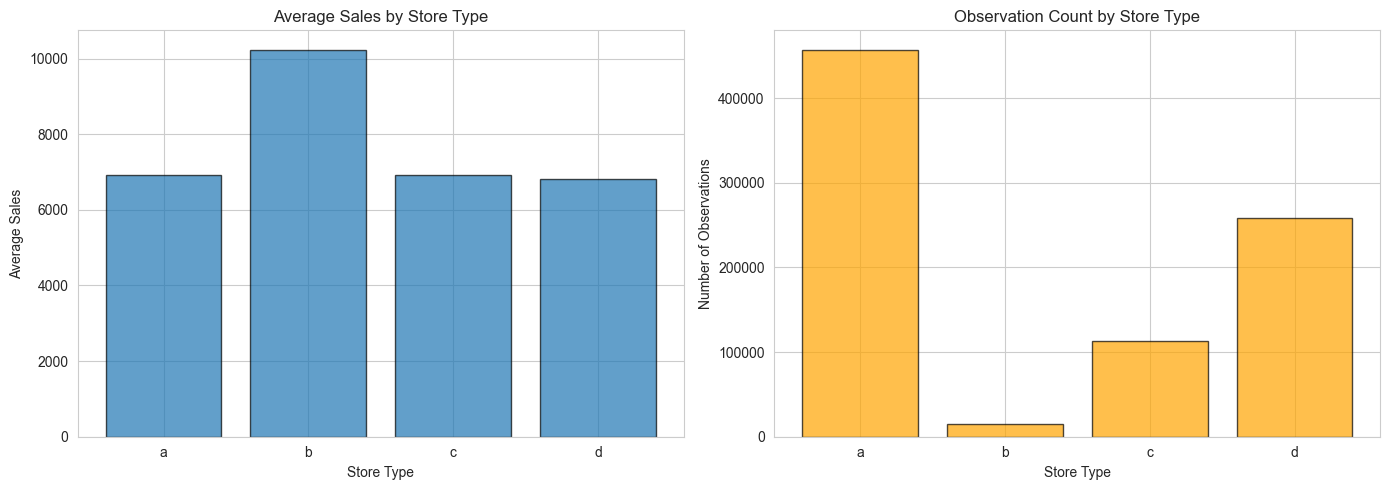

Saved: outputs/figures/04_sales_by_store_type.png

Sales Statistics by Store Type:


,StoreType,mean,median,count
0,a,6925.697754,6285.0,457042
1,b,10233.379883,9130.0,15560
2,c,6933.126465,6408.0,112968
3,d,6822.299805,6395.0,258768


In [12]:
# Sales by store type
store_type_sales = clean_df[clean_df['Sales'] > 0].groupby('StoreType')['Sales'].agg(['mean', 'median', 'count']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average sales by store type
axes[0].bar(store_type_sales['StoreType'], store_type_sales['mean'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Average Sales')
axes[0].set_title('Average Sales by Store Type')

# Count by store type
axes[1].bar(store_type_sales['StoreType'], store_type_sales['count'], alpha=0.7, edgecolor='black', color='orange')
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Number of Observations')
axes[1].set_title('Observation Count by Store Type')

plt.tight_layout()
plt.savefig('../outputs/figures/04_sales_by_store_type.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/04_sales_by_store_type.png")

print("\nSales Statistics by Store Type:")
display(store_type_sales)

### 4.5 Promotion Effect

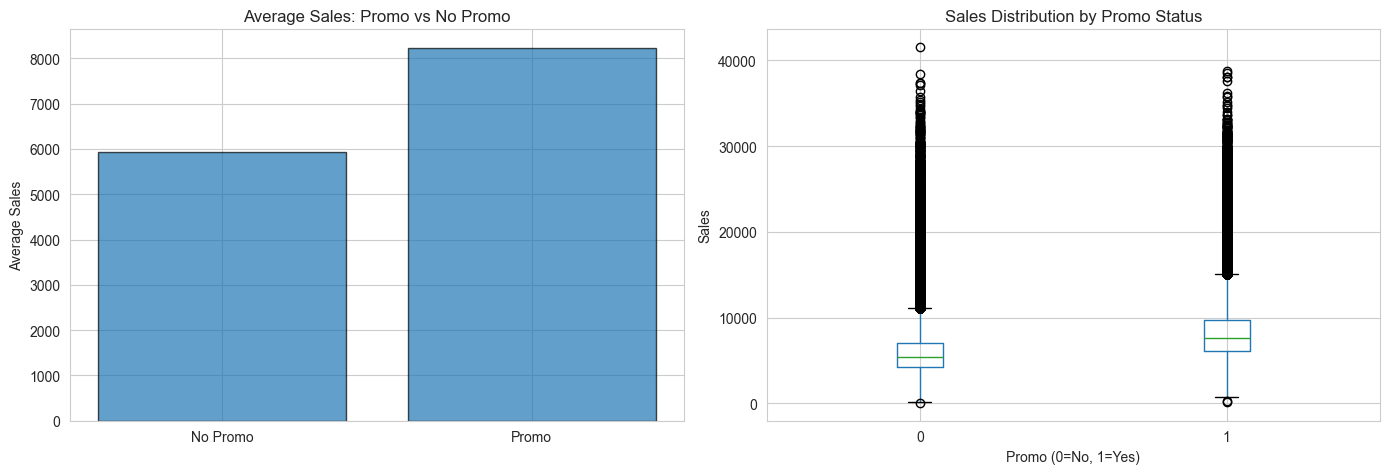

Saved: outputs/figures/05_sales_by_promo.png

Sales Statistics by Promo Status:


,Promo,mean,median,count
0,0,5929.826172,5459.0,467463
1,1,8228.739258,7650.0,376875



Promo Lift: 38.77%


In [13]:
# Sales by promotion status
promo_sales = clean_df[clean_df['Sales'] > 0].groupby('Promo')['Sales'].agg(['mean', 'median', 'count']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average sales with/without promo
axes[0].bar(promo_sales['Promo'].map({0: 'No Promo', 1: 'Promo'}), promo_sales['mean'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Average Sales')
axes[0].set_title('Average Sales: Promo vs No Promo')

# Box plot for more detail
clean_df[clean_df['Sales'] > 0].boxplot(column='Sales', by='Promo', ax=axes[1])
axes[1].set_xlabel('Promo (0=No, 1=Yes)')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales Distribution by Promo Status')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.savefig('../outputs/figures/05_sales_by_promo.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/05_sales_by_promo.png")

print("\nSales Statistics by Promo Status:")
display(promo_sales)

# Calculate promo lift
promo_lift = (promo_sales[promo_sales['Promo']==1]['mean'].values[0] / 
              promo_sales[promo_sales['Promo']==0]['mean'].values[0] - 1) * 100
print(f"\nPromo Lift: {promo_lift:.2f}%")

### 4.6 Competition Distance Analysis

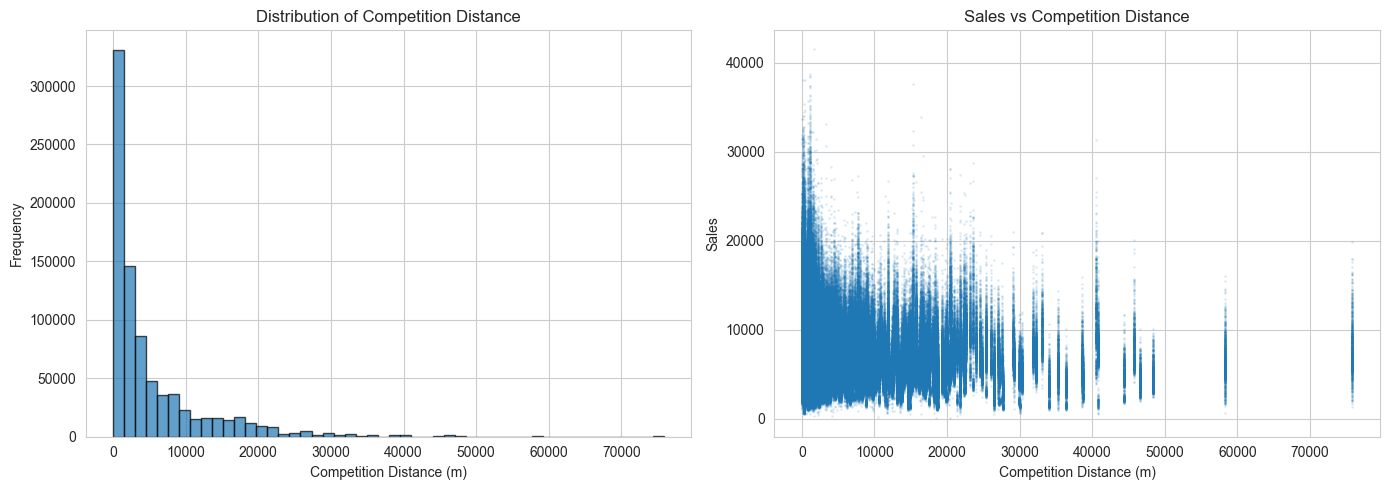

Saved: outputs/figures/06_competition_analysis.png


In [14]:
# Filter out the placeholder value we filled for missing competition distance
comp_df = clean_df[(clean_df['CompetitionDistance'] < 100000) & (clean_df['Sales'] > 0)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of competition distance
axes[0].hist(comp_df['CompetitionDistance'], bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Competition Distance (m)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Competition Distance')

# Sales vs competition distance (scatter with trend)
axes[1].scatter(comp_df['CompetitionDistance'], comp_df['Sales'], alpha=0.1, s=1)
axes[1].set_xlabel('Competition Distance (m)')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales vs Competition Distance')

plt.tight_layout()
plt.savefig('../outputs/figures/06_competition_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/06_competition_analysis.png")

### 4.7 Correlation Analysis

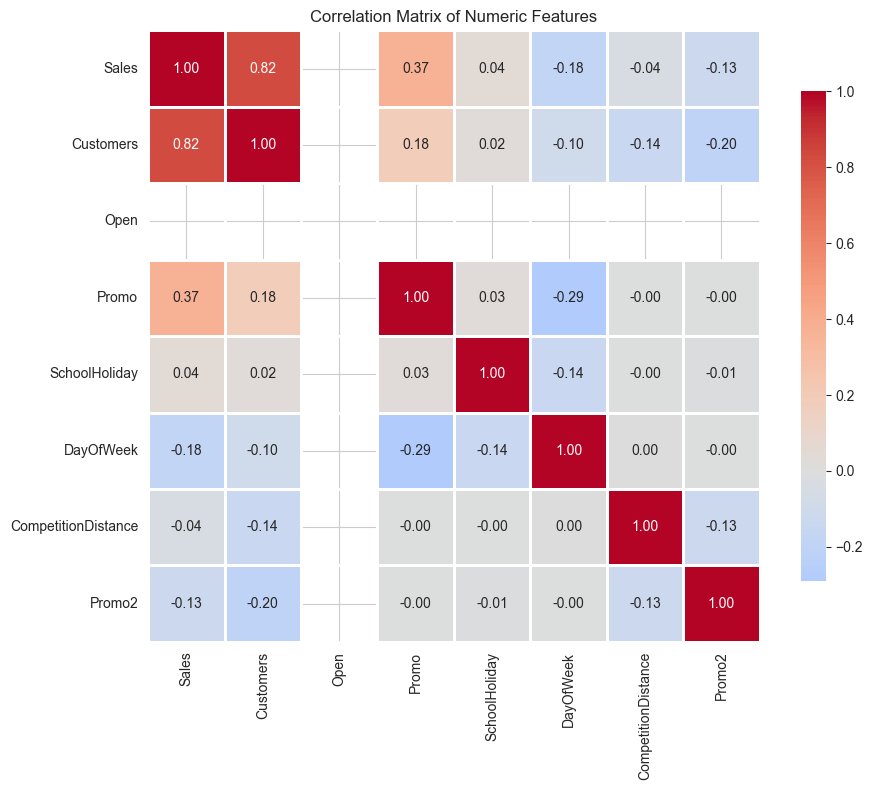

Saved: outputs/figures/07_correlation_matrix.png

Top correlations with Sales:


Sales                  1.000000
Customers              0.823552
Promo                  0.368199
SchoolHoliday          0.038635
CompetitionDistance   -0.043688
Promo2                -0.127556
DayOfWeek             -0.178753
Open                        NaN
Name: Sales, dtype: float64

In [15]:
# Select numeric columns for correlation
numeric_cols = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 
                'DayOfWeek', 'CompetitionDistance', 'Promo2']

# Calculate correlation matrix (excluding zeros in sales)
corr_df = clean_df[clean_df['Sales'] > 0][numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('../outputs/figures/07_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: outputs/figures/07_correlation_matrix.png")

print("\nTop correlations with Sales:")
sales_corr = corr_df['Sales'].sort_values(ascending=False)
display(sales_corr)

## 5. Data Summary

Let's generate a final summary of the cleaned data:

In [16]:
summary = get_data_summary(clean_df)

print("="*60)
print("CLEANED DATA SUMMARY")
print("="*60)
print(f"Number of rows: {summary['n_rows']:,}")
print(f"Number of columns: {summary['n_cols']}")
print(f"Number of stores: {summary['n_stores']}")
print(f"Date range: {summary['date_range'][0]} to {summary['date_range'][1]}")
print(f"Number of days: {summary['n_days']}")
print("\nMissing values after cleaning:")
for col, count in summary['missing_values'].items():
    if count > 0:
        print(f"  {col}: {count}")
if all(count == 0 for count in summary['missing_values'].values()):
    print("  None - all missing values handled!")
print("="*60)

CLEANED DATA SUMMARY
Number of rows: 1,017,209
Number of columns: 18
Number of stores: 1115
Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Number of days: 941

Missing values after cleaning:
  None - all missing values handled!


## 6. Save Cleaned Data

In [17]:
# Save cleaned data to parquet
save_processed_data(clean_df, output_path='../data/processed/train_clean.parquet')

print("\n" + "="*60)
print("Phase 1 Complete!")
print("="*60)
print(f"Cleaned data saved to: data/processed/train_clean.parquet")
print(f"Visualizations saved to: outputs/figures/")
print(f"\nReady for Phase 2: Feature Engineering")
print("="*60)

2025-11-30 22:09:44 - data.make_dataset - INFO - Saving cleaned data to ../data/processed/train_clean.parquet
2025-11-30 22:09:45 - data.make_dataset - INFO - Saved 1,017,209 rows to ../data/processed/train_clean.parquet (3.63 MB)

Phase 1 Complete!
Cleaned data saved to: data/processed/train_clean.parquet
Visualizations saved to: outputs/figures/

Ready for Phase 2: Feature Engineering
